In [1]:
from importlib.machinery import SourceFileLoader
import pdb
import matplotlib.pyplot as plt
from time import sleep
from tqdm.notebook import tqdm_notebook
import numpy as np
from copy import copy

In [2]:
plt.style.use('default')
plt.rc('figure', figsize = (15,8))
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [3]:
N = 10

# Comienzo a hacer los cambios

In [76]:
steps = int(1e5)
KT = np.hstack([ 2+np.logspace(-2, np.log10(2), 20) , 2-np.logspace(-2, np.log10(2),20)])
KT = KT[KT>0]
KT.sort()
KT = KT[::-1]
beta = 1/KT

In [77]:
changes = np.random.randint(N, size=(steps, 2, len(beta)))

In [78]:
coins = np.random.rand(steps, len(beta))

In [ ]:
S = []
acumM = []
acumE = []
Mhist = []
Ehist = []
flips = []

progress = tqdm_notebook(enumerate(beta), ncols = 700, total=len(beta))
for t, Beta in progress:
    if len(S) > 0:
        S.append(copy(S[-1]))
    else:
        S.append( np.random.randint(2, size=(N,N))*2-1)
        
    E = [
        -0.5* S[-1]*(
                np.roll(S, 1, 0)+
                np.roll(S[-1], -1, 0)+
                np.roll(S[-1], 1, 1)+
                np.roll(S[-1], -1, 1)
        ).sum()]
    M = [S[-1].sum()/N**2]
    Macum = np.abs(M); Eacum = sum(E)
    progress.set_description(f'Beta = {Beta}')
    flips.append(0)
    for i, change in enumerate(changes[:,:,t]):
#        Saux = S[-1].copy()
#        NEIG = np.roll(Saux, 1, 0)+np.roll(Saux, -1, 0) + np.roll(Saux, 1, 1) + np.roll(Saux, -1, 1) 
        NEIG = S[-1][change[0]-N,change[1]]+S[-1][change[0]-1, change[1]] +\
               S[-1][change[0],change[1]-N] + S[-1][change[0],change[1]-1] 
#        Saux = copy(-S[-1][change[0],change[1]])
        DE_candidate = -S[-1][change[0],change[1]]*NEIG
        if (DE_candidate < 0) or (coins[i, t] < np.exp(-Beta*DE_candidate)):
            S[-1][change[0],change[1]] *= -1# copy(Saux)
            DE = copy(DE_candidate)
            flips[-1] += 1
        else: 
            DE = 0
        M.append(M[-1]+2*Saux/N**2)
        E.append(E[-1]+DE)
        Macum += np.abs(M[-1])
        Eacum += E[-1]
    Mhist.append(M)
    Ehist.append(M)
    acumM.append(Macum/changes.shape[0])
    acumE.append(Eacum/changes.shape[0])
    

  0%|                                                                                                         …

In [ ]:
plt.plot(KT,np.array(acumM)*changes.shape[2]/changes.shape[0],'o-')

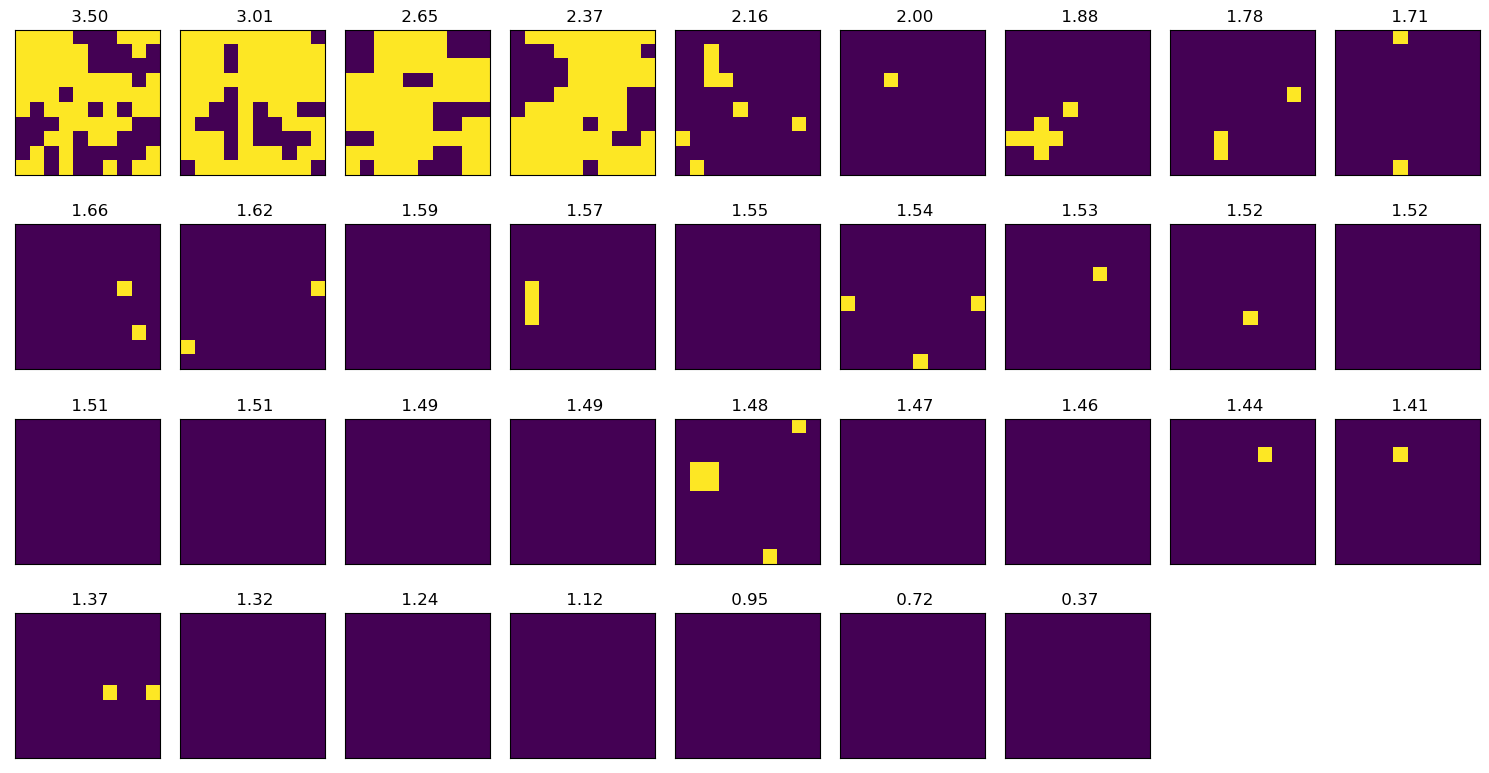

In [58]:
fig = plt.figure()
for i in range(len(S)):
    ax = fig.add_subplot(4, int(len(S)/4)+1, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(S[i])
    ax.set_title(' {:4.2f}'.format(KT[i]))
fig.tight_layout()

In [59]:
np.array(acumM)*changes.shape[2]/changes.shape[0]

array([[0.34000194],
       [0.34000207],
       [0.34000262],
       [0.34000245],
       [0.34000248],
       [0.34000027],
       [0.34000003],
       [0.34000024],
       [0.3400001 ],
       [0.34000007],
       [0.34000007],
       [0.34000007],
       [0.34      ],
       [0.3400001 ],
       [0.34      ],
       [0.3400001 ],
       [0.34000003],
       [0.34000003],
       [0.34      ],
       [0.34      ],
       [0.34      ],
       [0.34      ],
       [0.34      ],
       [0.3400002 ],
       [0.34      ],
       [0.34      ],
       [0.34000003],
       [0.34000003],
       [0.34000007],
       [0.34      ],
       [0.34      ],
       [0.34      ],
       [0.34      ],
       [0.34      ]])

In [60]:
changes.shape

(200000, 2, 34)

In [61]:
KT

array([3.5       , 3.01329346, 2.64502854, 2.3663821 , 2.15554518,
       1.99601611, 1.87530897, 1.7839763 , 1.71486974, 1.66258049,
       1.62301599, 1.59307965, 1.57042841, 1.55328943, 1.54032127,
       1.53050896, 1.5230845 , 1.51746681, 1.51321621, 1.51      ,
       1.49      , 1.4856155 , 1.47930862, 1.47023649, 1.45718668,
       1.43841518, 1.41141332, 1.3725725 , 1.31670193, 1.23633491,
       1.12073098, 0.95444052, 0.71524003, 0.37116211])